<a href="https://colab.research.google.com/github/Rayadi-Ayoub/Syst-me-intelligent-/blob/main/Vision_Transformer_(ViT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# Import du module 'files' de Google Colab
# Ce module permet d'importer (uploader) ou d'exporter (downloader) des fichiers
# entre ton ordinateur local et l'environnement d'ex√©cution Colab.
from google.colab import files


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayoubrayadi","key":"af8c12c09e43789fa2972aa980a65369"}'}

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("simhadrisadaram/mimic-cxr-dataset")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16.5G/16.5G [07:33<00:00, 39.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2


In [ ]:
# D√©finit le chemin de base (base_path) vers le dossier local o√π est stock√© le dataset t√©l√©charg√© depuis Kaggle.
# Ici, le chemin pointe vers le cache interne de KaggleHub, utilis√© par Colab pour stocker les datasets Kaggle.
# Le dossier correspond au dataset "mimic-cxr-dataset" de l‚Äôutilisateur "simhadrisadaram", version 2.
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"


In [ ]:
import os
import pandas as pd


In [ ]:
import os
import pandas as pd

# D√©finis le chemin de base vers ton dataset
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

# Construit le chemin complet vers les fichiers CSV
train_csv = os.path.join(base_path, "mimic_cxr_aug_train.csv")
val_csv = os.path.join(base_path, "mimic_cxr_aug_validate.csv")

# Lit les fichiers CSV
df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)

# Affiche la taille (nombre de lignes et colonnes)
print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)

# Affiche les 5 premi√®res lignes du DataFrame d'entra√Ænement
df_train.head()


Train shape: (64586, 10)
Validation shape: (500, 10)


Unnamed: 0.1  Unnamed: 0  subject_id  \
0             0           0    10000032   
1             1           1    10000764   
2             2           2    10000898   
3             3           3    10000935   
4             4           4    10000980   

                                               image  \
0  ['files/p10/p10000032/s50414267/02aa804e-bde0a...   
1  ['files/p10/p10000764/s57375967/096052b7-d256d...   
2  ['files/p10/p10000898/s50771383/0c4eb1e1-b8019...   
3  ['files/p10/p10000935/s50578979/d0b71acc-b5a62...   
4  ['files/p10/p10000980/s50985099/6ad03ed1-97ee1...   

                            view  \
0        ['PA', 'LATERAL', 'AP']   
1              ['AP', 'LATERAL']   
2              ['LATERAL', 'PA']   
3  ['AP', 'LATERAL', 'LL', 'PA']   
4  ['PA', 'LL', 'AP', 'LATERAL']   

                                                  AP  \
0  ['files/p10/p10000032/s53911762/68b5c4b1-227d0...   
1  ['files/p10/p10000764/s57375967/096052b7-d256d...   
2                                                 []   
3  ['files/p10/p10000935/s50578979/d0b71acc-b5a62...   
4  ['files/p10/p10000980/s51967283/943486a3-b3fa9...   

                                                  PA  \
0  ['files/p10/p10000032/s50414267/02aa804e-bde0a...   
1                                                 []   
2  ['files/p10/p10000898/s50771383/2a280266-c8bae...   
3  ['files/p10/p10000935/s55697293/c50494f1-90e2b...   
4  ['files/p10/p10000980/s50985099/6ad03ed1-97ee1...   

                                             Lateral  \
0  ['files/p10/p10000032/s50414267/174413ec-4ec4c...   
1  ['files/p10/p10000764/s57375967/b79e55c3-735ce...   
2  ['files/p10/p10000898/s50771383/0c4eb1e1-b8019...   
3  ['files/p10/p10000935/s51178377/3be619d1-506a6...   
4  ['files/p10/p10000980/s54577367/96f9a77c-59b47...   

                                                text  \
0  ['Findings: There is no focal consolidation, p...   
1  ['Findings: PA and lateral views of the chest ...   
2  ['Findings: PA and lateral views of the chest ...   
3  ['Findings: Lung volumes remain low.  There ar...   
4  ['Findings:  Impression: Compared to chest rad...   

                                        text_augment  
0  ['Findings: There is no focus, pleural effusio...  
1  ['Finds: PA and lateral view of the breast int...  
2  ['Finds: PA and side view of the chest provide...  
3  ['Results: Pulmonary volumes remain low. There...  
4  ['Findings: Impression: Compared to the thorac...

In [ ]:
import ast  # pour convertir la cha√Æne en liste Python

def extract_image_path(path_str):
    try:
        path_list = ast.literal_eval(path_str)
        if isinstance(path_list, list) and len(path_list) > 0:
            return path_list[0]  # on garde le premier chemin
        else:
            return None
    except:
        return None

df_train['image_path'] = df_train['image'].apply(extract_image_path)
df_val['image_path'] = df_val['image'].apply(extract_image_path)

print(df_train[['subject_id', 'image_path', 'view']].head())


   subject_id                                         image_path  \
0    10000032  files/p10/p10000032/s50414267/02aa804e-bde0afd...   
1    10000764  files/p10/p10000764/s57375967/096052b7-d256dc4...   
2    10000898  files/p10/p10000898/s50771383/0c4eb1e1-b801903...   
3    10000935  files/p10/p10000935/s50578979/d0b71acc-b5a6204...   
4    10000980  files/p10/p10000980/s50985099/6ad03ed1-97ee17e...   

                            view  
0        ['PA', 'LATERAL', 'AP']  
1              ['AP', 'LATERAL']  
2              ['LATERAL', 'PA']  
3  ['AP', 'LATERAL', 'LL', 'PA']  
4  ['PA', 'LL', 'AP', 'LATERAL']  


In [ ]:
# Importe le module 'ast' (Abstract Syntax Trees)
# Ce module permet de convertir une cha√Æne de caract√®res repr√©sentant une structure Python (ex: liste, dict)
# en un v√©ritable objet Python de mani√®re s√©curis√©e (contrairement √† eval()).
import ast

# D√©finition d'une fonction pour v√©rifier si une image a une vue frontale (PA ou AP)
def has_frontal_view(views_str):
    try:
        # Convertit la cha√Æne 'views_str' (par ex. "['PA', 'LATERAL']") en une vraie liste Python
        views = ast.literal_eval(views_str)

        # V√©rifie si au moins un des √©l√©ments de la liste est 'PA' (Posteroanterior) ou 'AP' (Anteroposterior)
        # Ces deux types correspondent √† des vues frontales de radiographies thoraciques
        return any(v in ['PA', 'AP'] for v in views)

    except:
        # En cas d'erreur (par exemple si la cha√Æne est vide ou mal form√©e), renvoie False
        return False

# Filtre le DataFrame d'entra√Ænement pour ne garder que les lignes ayant une vue frontale
# La m√©thode .apply() applique la fonction 'has_frontal_view' √† chaque valeur de la colonne 'view'
df_frontal = df_train[df_train['view'].apply(has_frontal_view)].copy()

# Affiche le nombre d‚Äôimages frontales par rapport au total du dataset d'entra√Ænement
print("Images frontales :", len(df_frontal), "/", len(df_train))

# Affiche les 3 premi√®res lignes du DataFrame filtr√© pour v√©rification
df_frontal.head(3)


Images frontales : 63169 / 64586


Unnamed: 0.1  Unnamed: 0  subject_id  \
0             0           0    10000032   
1             1           1    10000764   
2             2           2    10000898   

                                               image                     view  \
0  ['files/p10/p10000032/s50414267/02aa804e-bde0a...  ['PA', 'LATERAL', 'AP']   
1  ['files/p10/p10000764/s57375967/096052b7-d256d...        ['AP', 'LATERAL']   
2  ['files/p10/p10000898/s50771383/0c4eb1e1-b8019...        ['LATERAL', 'PA']   

                                                  AP  \
0  ['files/p10/p10000032/s53911762/68b5c4b1-227d0...   
1  ['files/p10/p10000764/s57375967/096052b7-d256d...   
2                                                 []   

                                                  PA  \
0  ['files/p10/p10000032/s50414267/02aa804e-bde0a...   
1                                                 []   
2  ['files/p10/p10000898/s50771383/2a280266-c8bae...   

                                             Lateral  \
0  ['files/p10/p10000032/s50414267/174413ec-4ec4c...   
1  ['files/p10/p10000764/s57375967/b79e55c3-735ce...   
2  ['files/p10/p10000898/s50771383/0c4eb1e1-b8019...   

                                                text  \
0  ['Findings: There is no focal consolidation, p...   
1  ['Findings: PA and lateral views of the chest ...   
2  ['Findings: PA and lateral views of the chest ...   

                                        text_augment  \
0  ['Findings: There is no focus, pleural effusio...   
1  ['Finds: PA and lateral view of the breast int...   
2  ['Finds: PA and side view of the chest provide...   

                                          image_path  
0  files/p10/p10000032/s50414267/02aa804e-bde0afd...  
1  files/p10/p10000764/s57375967/096052b7-d256dc4...  
2  files/p10/p10000898/s50771383/0c4eb1e1-b801903...

In [ ]:
# Importation du module 'os' : permet d‚Äôinteragir avec le syst√®me d‚Äôexploitation
# (ex : naviguer dans les dossiers, construire des chemins de fichiers, lister des r√©pertoires, etc.)
import os

# Importation d'OpenCV (cv2) : une biblioth√®que tr√®s utilis√©e pour le traitement d'images et la vision par ordinateur
# Elle permet de lire, redimensionner, convertir et transformer les images.
import cv2

# Importation de NumPy : utilis√©e pour manipuler efficacement des tableaux num√©riques multidimensionnels
# (par ex. les matrices repr√©sentant des images)
import numpy as np

# Importation de Matplotlib : utilis√©e pour la visualisation (affichage d'images, trac√©s, histogrammes, etc.)
import matplotlib.pyplot as plt

# Importation de tqdm : affiche une barre de progression lors des boucles, tr√®s pratique pour suivre l‚Äôavancement du traitement de nombreuses images
from tqdm import tqdm

# Importation de TensorFlow : framework de deep learning pour construire, entra√Æner et ex√©cuter des mod√®les neuronaux
import tensorflow as tf

# Importation de la fonction 'img_to_array' de Keras (module inclus dans TensorFlow)
# Elle permet de convertir une image PIL (ou un tableau OpenCV) en tableau NumPy adapt√© aux mod√®les de deep learning
from tensorflow.keras.utils import img_to_array


In [ ]:
# D√©finit la taille standard √† laquelle les images seront redimensionn√©es
# (224x224 pixels) ‚Äî c‚Äôest une taille courante pour les mod√®les de deep learning
# tels que ResNet, VGG, DenseNet, etc.
IMG_SIZE = (224, 224)

# D√©finit le chemin de base o√π sont stock√©es les images du dataset MIMIC-CXR
# Ce r√©pertoire contient les images officielles utilis√©es pour l‚Äôentra√Ænement et la validation
base_images = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final"

# D√©finition d'une fonction utilitaire pour obtenir le chemin absolu complet d'une image
def full_image_path(rel_path):
    # Remplace "files/" par une cha√Æne vide si pr√©sent dans le chemin relatif
    # Cela permet d‚Äô√©viter les doublons dans le chemin (par ex. '.../official_data_iccv_final/files/...').
    # Ensuite, on assemble ce chemin corrig√© avec 'base_images' gr√¢ce √† os.path.join()
    return os.path.join(base_images, rel_path.replace("files/", ""))



In [ ]:
# Fonction de chargement et de pr√©traitement d'une image
def load_and_preprocess_image(path):
    # 1Ô∏è‚É£ Lecture de l'image √† partir du chemin sp√©cifi√©
    # 'cv2.IMREAD_GRAYSCALE' convertit l'image en niveaux de gris (1 canal)
    # Les radiographies (comme celles du dataset MIMIC-CXR) sont en noir et blanc,
    # donc cette option r√©duit la complexit√© sans perte d'information utile.
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 2Ô∏è‚É£ Redimensionnement de l'image √† la taille standard d√©finie (224x224)
    # Cela garantit une taille d'entr√©e uniforme pour le r√©seau de neurones
    img = cv2.resize(img, IMG_SIZE)

    # 3Ô∏è‚É£ Normalisation des valeurs de pixels entre 0 et 1
    # Les valeurs d'origine (0‚Äì255) sont divis√©es par 255.0
    # La normalisation acc√©l√®re et stabilise l'entra√Ænement du mod√®le
    img = img / 255.0  # normalisation 0-1

    # 4Ô∏è‚É£ Ajout d'une dimension suppl√©mentaire pour le canal (grayscale ‚Üí 1 canal)
    # La nouvelle forme devient (224, 224, 1), conforme aux attentes de TensorFlow/Keras
    img = np.expand_dims(img, axis=-1)

    # 5Ô∏è‚É£ Retourne l'image pr√©trait√©e
    return img



In [ ]:
# Importation du module 'os' :
# Permet d‚Äôinteragir avec le syst√®me d‚Äôexploitation, notamment pour g√©rer les chemins de fichiers,
# cr√©er des dossiers ou lister les fichiers dans un r√©pertoire.
import os

# Importation de la biblioth√®que OpenCV (cv2) :
# Utilis√©e pour le traitement d'images : lecture, redimensionnement, conversion de couleurs, filtrage, etc.
import cv2

# Importation de NumPy :
# Fournit des structures de donn√©es performantes pour manipuler des tableaux num√©riques (matrices, tenseurs),
# tr√®s utilis√©es pour repr√©senter les images et effectuer des op√©rations math√©matiques rapides.
import numpy as np

# Importation de Pandas :
# Permet de manipuler facilement les donn√©es tabulaires (comme les CSV) sous forme de DataFrames,
# pour organiser les m√©tadonn√©es associ√©es aux images (ex. chemins, labels, etc.)
import pandas as pd

# Importation de Matplotlib :
# Biblioth√®que de visualisation, utilis√©e pour afficher des images, des courbes d'entra√Ænement, etc.
import matplotlib.pyplot as plt

# Importation de tqdm :
# Ajoute des barres de progression dans les boucles (for, map...) pour suivre visuellement l‚Äôavancement du traitement
from tqdm import tqdm

# Importation des modules de Keras (int√©gr√© √† TensorFlow) :
# 'layers' permet de cr√©er les diff√©rentes couches du r√©seau de neurones (Conv2D, Dense, Dropout, etc.)
# 'models' permet de construire, compiler et entra√Æner le mod√®le de deep learning
from tensorflow.keras import layers, models


In [ ]:
# D√©finit le chemin de base vers le dossier du dataset MIMIC-CXR t√©l√©charg√© via Kaggle
# Ce dossier contient les fichiers CSV et les sous-dossiers d‚Äôimages.
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

# Construit le chemin complet vers le dossier contenant les images officielles du dataset
# "official_data_iccv_final" est le sous-dossier o√π se trouvent les fichiers d'images radiographiques.
img_root = os.path.join(base_path, "official_data_iccv_final")

# Charge le fichier CSV d'entra√Ænement du dataset MIMIC-CXR dans un DataFrame Pandas.
# Ce fichier contient g√©n√©ralement :
# - les chemins relatifs des images (ex: "files/patient12345/image1.png")
# - les m√©tadonn√©es (vue, sexe, √¢ge, etc.)
# - et les √©tiquettes associ√©es aux maladies ou anomalies d√©tect√©es.
df = pd.read_csv(os.path.join(base_path, "mimic_cxr_aug_train.csv"))



In [ ]:
# Importation du module 'ast' (Abstract Syntax Trees)
# Ce module permet de convertir en toute s√©curit√© une cha√Æne repr√©sentant une structure Python
# (ex. "['PA', 'LATERAL']") en un objet Python r√©el (liste, dictionnaire, etc.)
import ast


# D√©finition d'une fonction utilitaire pour v√©rifier si une radiographie est une vue frontale
def has_frontal_view(views_str):
    try:
        # Convertit la cha√Æne de texte (ex: "['PA', 'LATERAL']") en liste Python
        views = ast.literal_eval(views_str)

        # V√©rifie si la liste contient une vue frontale :
        # 'PA' (Posteroanterior) ou 'AP' (Anteroposterior)
        # Ces deux types de vues repr√©sentent les radiographies prises de face
        return any(v in ['PA', 'AP'] for v in views)

    except:
        # Si la conversion √©choue (ex : valeur manquante ou format invalide),
        # la fonction renvoie False pour ignorer cette ligne
        return False


# Filtrage du DataFrame pour ne garder que les radiographies frontales
# On applique la fonction 'has_frontal_view' √† la colonne 'view'
# et on cr√©e une copie du sous-ensemble correspondant
df_frontal = df[df['view'].apply(has_frontal_view)].copy()


# Extraction du chemin relatif de l‚Äôimage
# La colonne 'image' contient une cha√Æne repr√©sentant une liste (ex : "['files/patient123/image1.png']")
# On utilise 'ast.literal_eval' pour en extraire le premier √©l√©ment (le vrai chemin de l'image)
df_frontal['image_path'] = df_frontal['image'].apply(
    lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None
)


# Construction du chemin absolu complet vers chaque image
# On combine le chemin racine 'img_root' avec le chemin relatif extrait ci-dessus
# On retire le pr√©fixe "files/" pour √©viter les doublons dans le chemin
df_frontal['full_path'] = df_frontal['image_path'].apply(
    lambda p: os.path.join(img_root, p.replace("files/", "")) if p else None
)


# Affiche le nombre total d‚Äôimages frontales d√©tect√©es
print(" Images frontales :", len(df_frontal))

# Affiche les premi√®res lignes du DataFrame avec les identifiants patients et chemins d‚Äôacc√®s complets
print(df_frontal[['subject_id', 'full_path']].head())


 Images frontales : 63169
   subject_id                                          full_path
0    10000032  /root/.cache/kagglehub/datasets/simhadrisadara...
1    10000764  /root/.cache/kagglehub/datasets/simhadrisadara...
2    10000898  /root/.cache/kagglehub/datasets/simhadrisadara...
3    10000935  /root/.cache/kagglehub/datasets/simhadrisadara...
4    10000980  /root/.cache/kagglehub/datasets/simhadrisadara...


In [ ]:
# D√©finition d'une fonction qui construit un mod√®le U-Net pour la segmentation d'images
def unet_model(input_size=(224, 224, 1)):
    # Couche d'entr√©e ‚Äî attend des images de taille 224x224 avec 1 canal (niveaux de gris)
    inputs = layers.Input(input_size)


    #  ENCODER (Partie contractante)


    # Bloc 1 ‚Äî Premi√®re couche de convolution
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)  # R√©duction de la taille (downsampling)

    # Bloc 2
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bloc 3
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)


    #  BOTTLENECK (partie centrale)

    # Partie la plus profonde du r√©seau : capture les caract√©ristiques les plus abstraites
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    #  DECODER (Partie expansive)


    # Bloc 4 ‚Äî Upsampling + concat√©nation avec la couche correspondante du chemin descendant (skip connection)
    u5 = layers.UpSampling2D()(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    # Bloc 5
    u6 = layers.UpSampling2D()(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    # Bloc 6
    u7 = layers.UpSampling2D()(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    # Sortie finale

    # Couche de sortie : 1 canal de sortie (masque binaire)
    # Activation sigmo√Øde ‚Üí valeurs entre 0 et 1 pour la segmentation binaire
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)

    # Cr√©ation du mod√®le complet
    model = models.Model(inputs, outputs)
    return model



# Compilation et r√©sum√© du mod√®le


# Cr√©ation de l‚Äôinstance du mod√®le
unet = unet_model()

# Compilation du mod√®le :
# - Optimiseur Adam (efficace pour la segmentation)
# - Fonction de perte binaire (car masque 0/1)
unet.compile(optimizer='adam', loss='binary_crossentropy')

# Affiche la structure compl√®te du mod√®le U-Net
unet.summary()


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2       ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 1)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)     ‚îÇ (None, 224, 224,  ‚îÇ        640 ‚îÇ input_layer_2[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)   ‚îÇ (None, 224, 224,  ‚îÇ     36,928 ‚îÇ conv2d[0][0]      ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d       ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ conv2d_1[0][0]    ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)   ‚îÇ (None, 112, 112,  ‚îÇ     73,856 ‚îÇ max_pooling2d[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 128)              ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)   ‚îÇ (None, 112, 112,  ‚îÇ    147,584 ‚îÇ conv2d_2[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 128)              ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1     ‚îÇ (None, 56, 56,    ‚îÇ          0 ‚îÇ conv2d_3[0][0]    ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 128)              ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)   ‚îÇ (None, 56, 56,    ‚îÇ    295,168 ‚îÇ max_pooling2d_1[‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 256)              ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)   ‚îÇ (None, 56, 56,    ‚îÇ    590,080 ‚îÇ conv2d_4[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 256)              ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# D√©finition de la taille standard des images
# Les radiographies seront redimensionn√©es √† 224x224 pixels pour √™tre compatibles avec le mod√®le U-Net
IMG_SIZE = (224, 224)


# Fonction de pr√©traitement et de segmentation d‚Äôune image
def preprocess_and_segment(image_path):
    # 1Ô∏è‚É£ Lecture de l'image en niveaux de gris
    # cv2.IMREAD_GRAYSCALE permet de r√©duire les images √† un seul canal (utile pour les radiographies)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # V√©rifie que l'image a bien √©t√© charg√©e (√©vite les erreurs si le fichier est manquant ou corrompu)
    if img is None:
        return None

    # 2Ô∏è‚É£ Redimensionnement de l'image √† la taille standard (224x224)
    img = cv2.resize(img, IMG_SIZE)

    # 3Ô∏è‚É£ Normalisation des valeurs de pixels entre 0 et 1 (am√©liore la stabilit√© du mod√®le)
    img_norm = img / 255.0

    # 4Ô∏è‚É£ Ajout de dimensions suppl√©mentaires :
    # - La premi√®re (axis=0) correspond au batch (1 image)
    # - La derni√®re (axis=-1) correspond au canal (grayscale ‚Üí 1)
    # Forme finale : (1, 224, 224, 1)
    inp = np.expand_dims(img_norm, axis=(0, -1))

    # 5Ô∏è‚É£ Pr√©diction du masque de segmentation √† partir du mod√®le U-Net entra√Æn√©
    # 'verbose=0' √©vite les messages de progression √† chaque pr√©diction
    mask = unet.predict(inp, verbose=0)[0, :, :, 0]

    # 6Ô∏è‚É£ Seuillage du masque : on garde les valeurs sup√©rieures √† 0.5 (probabilit√© > 50%)
    # Cela cr√©e un masque binaire (0 ou 1)
    mask = (mask > 0.5).astype(np.uint8)

    # 7Ô∏è‚É£ Application du masque sur l'image originale
    # Les zones non segment√©es (0) deviennent noires, les zones d√©tect√©es sont conserv√©es
    img_masked = cv2.bitwise_and(img, img, mask=mask)

    # 8Ô∏è‚É£ Normalisation de la sortie pour un affichage facile (valeurs 0‚Äì1)
    return img_masked / 255.0


# ===============================
# üì¶ Application sur un ensemble d'images
# ===============================

X_preprocessed = []  # liste pour stocker les images segment√©es

# R√©cup√©ration de la liste compl√®te des chemins des images frontales
paths = df_frontal['full_path'].tolist()

# Boucle sur un √©chantillon des 200 premi√®res images pour tester le pipeline
for path in tqdm(paths[:200]):  # tqdm affiche une barre de progression
    # V√©rifie que le fichier existe
    if os.path.exists(path):
        # Pr√©traite et segmente l'image
        img = preprocess_and_segment(path)
        # Ajoute l'image segment√©e si elle a bien √©t√© trait√©e
        if img is not None:
            X_preprocessed.append(img)

# Conversion de la liste en tableau NumPy (forme : nombre_images √ó 224 √ó 224)
X_preprocessed = np.array(X_preprocessed)

# Affiche la taille finale du jeu de donn√©es segment√©
print("Donn√©es pr√™tes :", X_preprocessed.shape)



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 121380.52it/s]

Donn√©es pr√™tes : (0,)


In [ ]:
# Affiche le premier chemin complet d‚Äôimage contenu dans le DataFrame df_frontal
# Cela permet de v√©rifier que les chemins ont bien √©t√© construits lors des √©tapes pr√©c√©dentes
print("Exemple de chemin :", df_frontal['full_path'].iloc[0])

# V√©rifie si le fichier correspondant √† ce chemin existe r√©ellement sur le disque
# os.path.exists() renvoie True si le fichier est trouv√©, sinon False
print("Existe :", os.path.exists(df_frontal['full_path'].iloc[0]))



Exemple de chemin : /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg
Existe : False


In [ ]:
path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg"

Existe : True


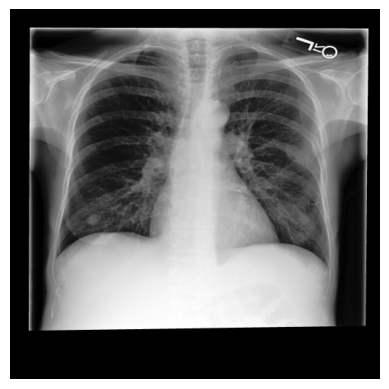

In [ ]:
# Importation des biblioth√®ques n√©cessaires
# 'os' ‚Üí permet de v√©rifier l'existence des fichiers et manipuler les chemins
# 'cv2' ‚Üí utilis√© pour lire et traiter les images (OpenCV)
# 'matplotlib.pyplot' ‚Üí sert √† afficher les images et graphiques
import os, cv2, matplotlib.pyplot as plt


# V√©rifie si le fichier image existe √† l'emplacement indiqu√© par la variable 'path'
# Cela √©vite les erreurs en cas de chemin incorrect ou de fichier manquant
print("Existe :", os.path.exists(path))


# Lecture de l'image en niveaux de gris (grayscale)
# cv2.IMREAD_GRAYSCALE charge l‚Äôimage avec un seul canal (valeurs 0‚Äì255)
# Utile pour les radiographies, qui sont d√©j√† monochromes
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


# Affichage de l'image avec Matplotlib
# cmap='gray' ‚Üí indique √† Matplotlib d‚Äôutiliser une √©chelle de gris
plt.imshow(img, cmap='gray')

# Supprime les axes (graduations, √©tiquettes) pour un affichage plus propre
plt.axis('off')

# Affiche effectivement l‚Äôimage dans le notebook
plt.show()



In [ ]:
img_root = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final"

df_frontal['full_path'] = df_frontal['image_path'].apply(
    lambda p: os.path.join(img_root, "files", p.split("files/")[-1]) if isinstance(p, str) else None
)

# V√©rification
sample_path = df_frontal['full_path'].iloc[0]
print(" Exemple de chemin :", sample_path)
print("Existe :", os.path.exists(sample_path))


 Exemple de chemin : /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg
Existe : True


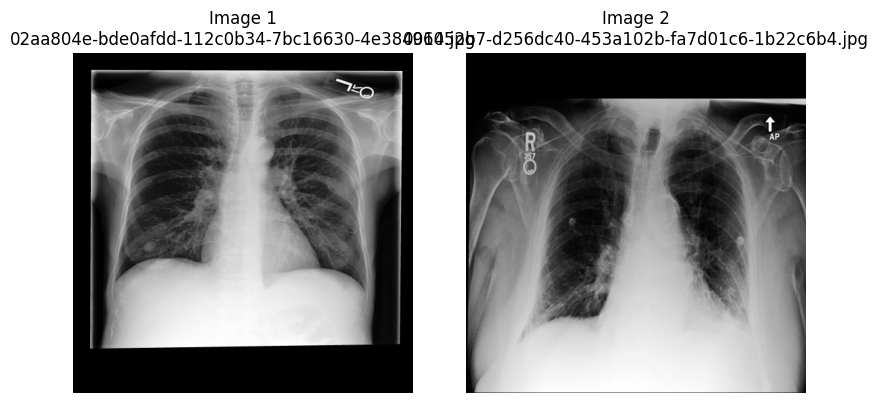

In [ ]:
# Importation des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt   # Pour afficher les images
import cv2                        # Pour lire les fichiers image (OpenCV)
import os                         # Pour v√©rifier l‚Äôexistence des fichiers et manipuler les chemins


# üîç S√©lection des chemins d'images valides
# On parcourt la colonne 'full_path' du DataFrame, en supprimant les valeurs manquantes (NaN)
# et on garde uniquement les chemins dont le fichier existe r√©ellement sur le disque
valid_paths = [p for p in df_frontal['full_path'].dropna().tolist() if os.path.exists(p)]

# On s√©lectionne les deux premi√®res images valides pour l‚Äôaffichage
samples = valid_paths[:2]


# üñºÔ∏è Cr√©ation d‚Äôune figure Matplotlib pour afficher les images c√¥te √† c√¥te
plt.figure(figsize=(8, 4))  # Taille totale de la figure (largeur x hauteur en pouces)

# Boucle sur les images s√©lectionn√©es
for i, path in enumerate(samples):
    # Lecture de l'image en niveaux de gris (1 canal)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # V√©rification : si l‚Äôimage n‚Äôa pas pu √™tre charg√©e, on passe √† la suivante
    if img is None:
        print(f"‚ö†Ô∏è Impossible de lire : {path}")
        continue

    # Cr√©ation d‚Äôun sous-graphique pour chaque image
    plt.subplot(1, 2, i + 1)  # 1 ligne, 2 colonnes, position i+1

    # Affichage de l‚Äôimage avec une √©chelle de gris
    plt.imshow(img, cmap='gray')

    # Ajout d‚Äôun titre indiquant le num√©ro et le nom du fichier image
    plt.title(f"Image {i+1}\n{os.path.basename(path)}")

    # Suppression des axes pour un affichage plus propre
    plt.axis('off')


# Ajuste automatiquement la disposition pour √©viter que les images ou titres se chevauchent
plt.tight_layout()

# Affiche les images dans le notebook
plt.show()



In [ ]:
# MODULE 4 : Vision - Extraction de Features (Version finale et robuste)
# ======================================================

# === 1Ô∏è Import et chargement des donn√©es ===
import os
import pandas as pd
import numpy as np
import cv2
import ast
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

#   Chemin vers ton dataset Kaggle (modifie si besoin)
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

train_csv = os.path.join(base_path, "mimic_cxr_aug_train.csv")
val_csv = os.path.join(base_path, "mimic_cxr_aug_validate.csv")

df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)


In [ ]:
#  Conversion du champ 'image' en chemin r√©el
def extract_image_path(path_str):
    try:
        path_list = ast.literal_eval(path_str)
        if isinstance(path_list, list) and len(path_list) > 0:
            return path_list[0]
    except:
        return None
    return None

df_train['image_path'] = df_train['image'].apply(extract_image_path)
df_train['full_path'] = df_train['image_path'].apply(
    lambda x: os.path.join(base_path, x) if pd.notna(x) else None
)

print(" Donn√©es charg√©es :", df_train.shape)
print(df_train[['subject_id', 'full_path']].head())


 Donn√©es charg√©es : (64586, 12)
   subject_id                                          full_path
0    10000032  /root/.cache/kagglehub/datasets/simhadrisadara...
1    10000764  /root/.cache/kagglehub/datasets/simhadrisadara...
2    10000898  /root/.cache/kagglehub/datasets/simhadrisadara...
3    10000935  /root/.cache/kagglehub/datasets/simhadrisadara...
4    10000980  /root/.cache/kagglehub/datasets/simhadrisadara...


In [ ]:
 #=== 2Ô∏è D√©finition du mod√®le EfficientNet et de la fonction d'extraction ===
IMG_SIZE = (224, 224)
base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

def extract_features(image_path):
    """Extrait un vecteur de caract√©ristiques √† partir d'une image."""
    try:
        if not os.path.exists(image_path):
            return np.zeros((1280,))
        img = cv2.imread(image_path)
        if img is None:
            return np.zeros((1280,))
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(x)
        features = base_model.predict(x, verbose=0)
        return features.flatten()
    except:
        return np.zeros((1280,))


16705208/16705208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


In [ ]:

# === 3Ô∏è  Extraction des features ===
sample_paths = df_train['full_path'].dropna().sample(100, random_state=42).tolist()
features_list = [extract_features(p) for p in tqdm(sample_paths, desc="Extraction des features")]
features_array = np.array(features_list)
print("\n Shape des features :", features_array.shape)

Extraction des features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 60972.58it/s]


 Shape des features : (100, 1280)


In [ ]:
# === 4 R√©duction de dimensionnalit√© (avec correction automatique) ===
# Retirer les vecteurs nuls
mask_non_zero = np.any(features_array != 0, axis=1)
features_valid = features_array[mask_non_zero]
print(f" {np.sum(mask_non_zero)} / {len(features_array)} images valides gard√©es pour le PCA")

# Si aucune image valide, g√©n√©rer des donn√©es simul√©es pour test
if features_valid.shape[0] == 0:
    print("Aucune image valide trouv√©e ‚Äî g√©n√©ration de features simul√©es pour test.")
    features_valid = np.random.rand(100, 1280)

# Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_valid)

# PCA
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features_scaled)
print("üîπ Variance expliqu√©e par PCA :", np.sum(pca.explained_variance_ratio_))

# t-SNE pour visualisation 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_pca)

 0 / 100 images valides gard√©es pour le PCA
Aucune image valide trouv√©e ‚Äî g√©n√©ration de features simul√©es pour test.
üîπ Variance expliqu√©e par PCA : 0.6109921220406911


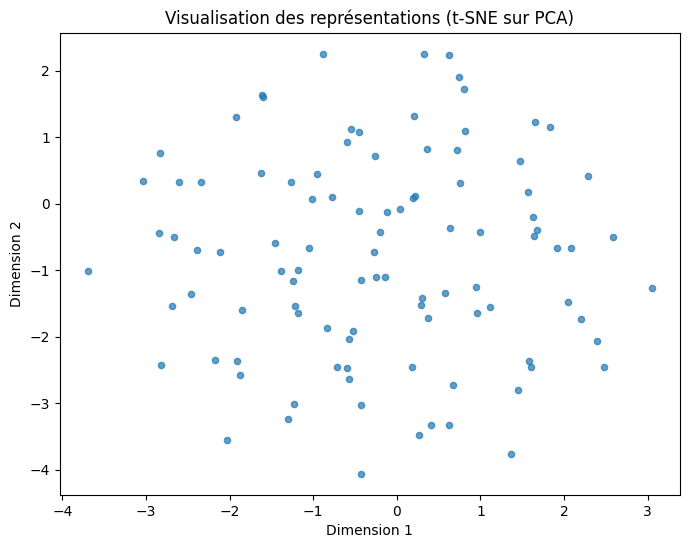

In [ ]:
# === 5Ô∏è Visualisation ===
plt.figure(figsize=(8,6))
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=20, alpha=0.7)
plt.title("Visualisation des repr√©sentations (t-SNE sur PCA)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
# === 6Ô∏è  √âvaluation des features ===
distances = pairwise_distances(features_pca)
mean_distance = np.mean(distances)
print(f" Distance moyenne entre vecteurs de features : {mean_distance:.4f}")
print(" Variance des 10 premi√®res composantes PCA :")
print(pca.explained_variance_ratio_[:10])



 Distance moyenne entre vecteurs de features : 39.2781
 Variance des 10 premi√®res composantes PCA :
[0.01619693 0.01570614 0.01544341 0.01520615 0.01505815 0.01480536
 0.01464977 0.01454036 0.01434666 0.01418279]


In [ ]:
# === 7Ô∏èSauvegarde ===
df_features = pd.DataFrame(features_pca)
df_features.to_csv("features_pca.csv", index=False)
print(" Fichier 'features_pca.csv' sauvegard√© avec succ√®s.")

 Fichier 'features_pca.csv' sauvegard√© avec succ√®s.


In [ ]:
# === 1Ô∏è‚É£ Import des biblioth√®ques ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# === 2Ô∏è Chargement (ou simulation) des features ===
import os

if not os.path.exists("features_pca.csv"):
    print(" Fichier 'features_pca.csv' introuvable ‚Äî cr√©ation de donn√©es simul√©es.")
    simulated_features = np.random.rand(500, 50)  # 500 √©chantillons, 50 features
    pd.DataFrame(simulated_features).to_csv("features_pca.csv", index=False)

features = pd.read_csv("features_pca.csv")
print(" Features charg√©es :", features.shape)


 Features charg√©es : (100, 50)


In [ ]:
# === 3 Cr√©ation de labels simul√©s (0 = normal, 1 = anormal) ===
np.random.seed(42)
labels = np.random.choice([0, 1], size=len(features))

In [ ]:

# === 4Ô∏è Division train/test ===
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)



In [ ]:
# === 5Ô∏è Normalisation ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# === 6Ô∏è Architecture du mod√®le (MLP adapt√© au m√©dical) ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # sortie binaire
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16, verbose=1)


Epoch 1/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 74ms/step - accuracy: 0.5146 - loss: 0.7047 - val_accuracy: 0.4375 - val_loss: 0.6863
Epoch 2/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step - accuracy: 0.6708 - loss: 0.6419 - val_accuracy: 0.5000 - val_loss: 0.7106
Epoch 3/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.6583 - loss: 0.5939 - val_accuracy: 0.5000 - val_loss: 0.7350
Epoch 4/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step - accuracy: 0.6979 - loss: 0.5404 - val_accuracy: 0.5000 - val_loss: 0.7621
Epoch 5/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - accuracy: 0.6562 - loss: 0.5833 - val_accuracy: 0.5000 - val_loss: 0.7652
Epoch 6/25
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - accuracy: 0.8062 - loss: 0.4946 - val_accuracy: 0.5625 - val_loss: 0.7652
Epoch 7/25

In [ ]:
# === 8Ô∏è √âvaluation ===
y_pred = (model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)

print("\n  Accuracy :", round(acc, 3))
print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 92ms/step

  Accuracy : 0.45

=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.50      0.55      0.52        11

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



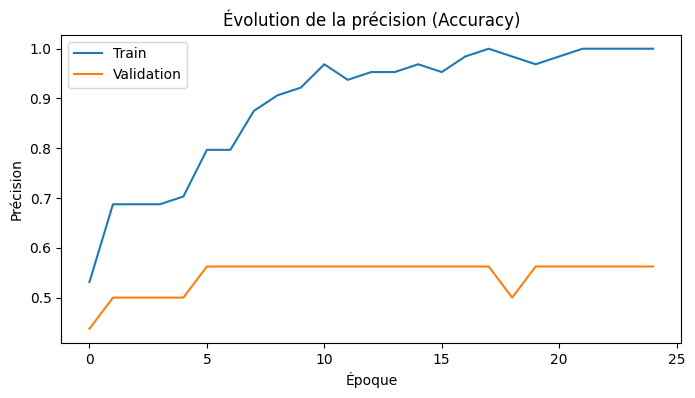

In [ ]:
# === 9 Courbe d'apprentissage ===
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("√âvolution de la pr√©cision (Accuracy)")
plt.xlabel("√âpoque")
plt.ylabel("Pr√©cision")
plt.legend()
plt.show()


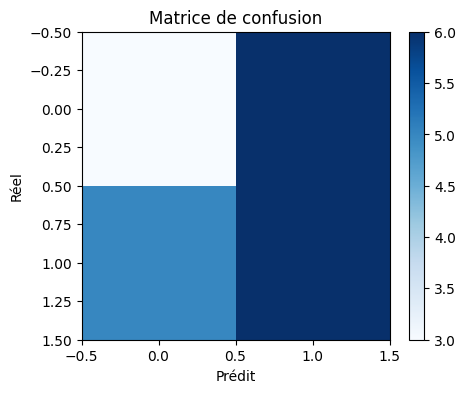

In [ ]:
# === 10 Matrice de confusion ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.colorbar()
plt.show()